<a href="https://colab.research.google.com/github/Giovannacm/digital-image-processing-msc/blob/main/PID_Aula4e5_Implementacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import skimage.io, skimage.exposure, skimage.util
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np

# Criação das imagens 
(256 x 256 pixels e 256 níveis de cinza)

In [2]:
image_height = 256
image_width = 256
gray_levels = 256
depth_levels = gray_levels - 1

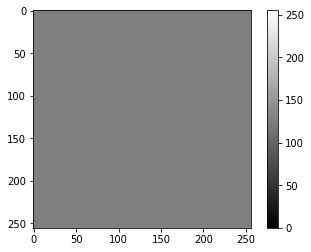

In [3]:
image_a = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 2
image_a[:, :] = int(depth_levels / gray_shades)

plt.imshow(image_a, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_a.png', image_a, vmin=0, vmax=depth_levels, cmap='gray')

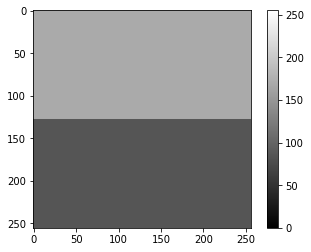

In [4]:
image_b = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 3
image_b[:int(image_height/2) , :] = int(depth_levels / gray_shades) * 2
image_b[int(image_height/2):, :] = int(depth_levels / gray_shades) * 1

plt.imshow(image_b, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_b.png', image_b, vmin=0, vmax=depth_levels, cmap='gray')

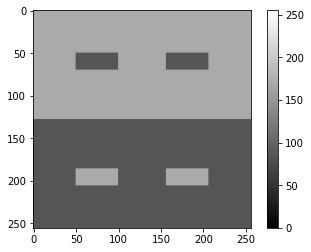

In [5]:
image_c = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 3
image_c[:int(image_height/2) , :] = int(depth_levels / gray_shades) * 2
image_c[int(image_height/2):, :] = int(depth_levels / gray_shades) * 1

image_c[50:70, 50:100] = int(depth_levels / gray_shades) * 1
image_c[50:70, image_width-100:image_width-50] = int(depth_levels / gray_shades) * 1

image_c[image_height-70:image_height-50 , 50:100] = int(depth_levels / gray_shades) * 2
image_c[image_height-70:image_height-50 , image_width-100:image_width-50] = int(depth_levels / gray_shades) * 2

plt.imshow(image_c, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_c.png', image_c, vmin=0, vmax=depth_levels, cmap='gray')

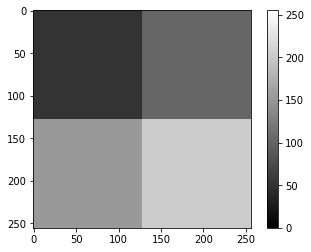

In [6]:
image_d = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 5
image_d[:int(image_height/2) , :int(image_width/2)] = int(depth_levels / gray_shades) * 1
image_d[:int(image_height/2), int(image_width/2):] = int(depth_levels / gray_shades) * 2
image_d[int(image_height/2): , :int(image_width/2)] = int(depth_levels / gray_shades) * 3
image_d[int(image_height/2):, int(image_width/2):] = int(depth_levels / gray_shades) * 4

plt.imshow(image_d, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_d.png', image_d, vmin=0, vmax=depth_levels, cmap='gray')

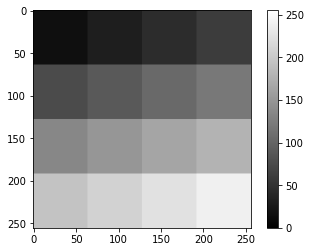

In [7]:
image_e = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 17
image_e[:int(image_height/4) , :int(image_width/4)] = int(depth_levels / gray_shades) * 1
image_e[:int(image_height/4) , int(image_width/4):int(image_width/4)*2] = int(depth_levels / gray_shades) * 2
image_e[:int(image_height/4) , int(image_width/4)*2:int(image_width/4)*3] = int(depth_levels / gray_shades) * 3
image_e[:int(image_height/4) , int(image_width/4)*3:] = int(depth_levels / gray_shades) * 4

image_e[int(image_height/4):int(image_height/4)*2 , :int(image_width/4)] = int(depth_levels / gray_shades) * 5
image_e[int(image_height/4):int(image_height/4)*2 , int(image_width/4):int(image_width/4)*2] = int(depth_levels / gray_shades) * 6
image_e[int(image_height/4):int(image_height/4)*2 , int(image_width/4)*2:int(image_width/4)*3] = int(depth_levels / gray_shades) * 7
image_e[int(image_height/4):int(image_height/4)*2 , int(image_width/4)*3:] = int(depth_levels / gray_shades) * 8

image_e[int(image_height/4)*2:int(image_height/4)*3 , :int(image_width/4)] = int(depth_levels / gray_shades) * 9
image_e[int(image_height/4)*2:int(image_height/4)*3 , int(image_width/4):int(image_width/4)*2] = int(depth_levels / gray_shades) * 10
image_e[int(image_height/4)*2:int(image_height/4)*3 , int(image_width/4)*2:int(image_width/4)*3] = int(depth_levels / gray_shades) * 11
image_e[int(image_height/4)*2:int(image_height/4)*3 , int(image_width/4)*3:] = int(depth_levels / gray_shades) * 12

image_e[int(image_height/4)*3: , :int(image_width/4)] = int(depth_levels / gray_shades) * 13
image_e[int(image_height/4)*3: , int(image_width/4):int(image_width/4)*2] = int(depth_levels / gray_shades) * 14
image_e[int(image_height/4)*3: , int(image_width/4)*2:int(image_width/4)*3] = int(depth_levels / gray_shades) * 15
image_e[int(image_height/4)*3: , int(image_width/4)*3:] = int(depth_levels / gray_shades) * 16

plt.imshow(image_e, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_e.png', image_e, vmin=0, vmax=depth_levels, cmap='gray')

# Geração do histograma de uma imagem

In [8]:
def get_histogram(image, gray_levels=256):
  histogram = np.zeros(gray_levels) #criando um vetor com todos os elementos zerados

  N, M = image.shape #altura (linha), largura (coluna)

  for i in range(N):
    for j in range(M):
      pixel_intensity = image[i, j]
      histogram[pixel_intensity] += 1
  
  return histogram

In [9]:
def plot_histogram(image, histogram=None, cdf=False):
  if histogram is None: #se nao enviar o histograma, gera pela biblioteca
    image_histogram, bin_centers = skimage.exposure.histogram(image)
    plt.plot(bin_centers, image_histogram, 'r')
  else:
    image_histogram = get_histogram(image)
    x = np.linspace(0, 256, 256)
    plt.plot(x, image_histogram, 'b')
  plt.xlim([0, 255])

  if cdf: #cumulative distribution function (cdf)
    image_cdf, bins_cdf = skimage.exposure.cumulative_distribution(image)
    plt.twinx().plot(bins_cdf, image_cdf, 'black')

In [10]:
image_e_histogram = get_histogram(image_e)

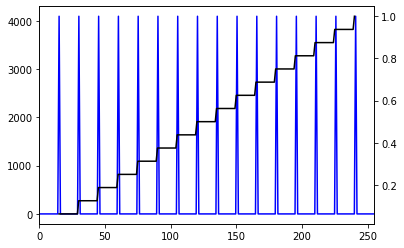

In [11]:
plot_histogram(image_e, image_e_histogram, cdf=True)

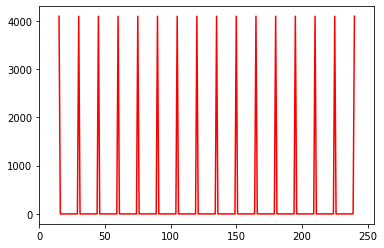

In [12]:
plot_histogram(image_e)

# Aplicação dos ruídos aditivos

In [13]:
def apply_salt_and_pepper_noise(image, probability, from_package=False):
  if from_package: #ruido aplicado pelo pacote
    noised_image = skimage.util.random_noise(image, mode='s&p', amount=probability)*255
    return noised_image

  compl_probability = 1 - probability
  noised_image = np.zeros(image.shape, dtype=np.uint8)

  N, M = image.shape
  
  for i in range(N):
    for j in range(M):
      pixel_probability = np.random.random()

      if pixel_probability < probability:
        noised_image[i][j] = 0
      elif pixel_probability > compl_probability:
        noised_image[i][j] = 255
      else:
        noised_image[i][j] = image[i][j]

  return noised_image

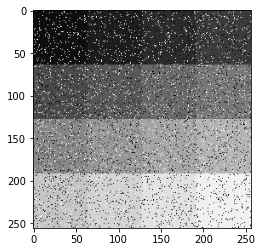

In [14]:
plt.imshow(apply_salt_and_pepper_noise(image_e, 0.05), cmap='gray', vmin=0, vmax=255)

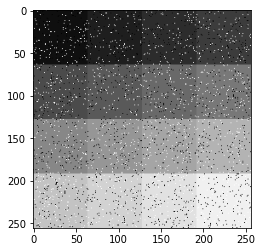

In [15]:
plt.imshow(apply_salt_and_pepper_noise(image_e, 0.05, from_package=True), cmap='gray', vmin=0, vmax=255)

In [16]:
def apply_uniform_noise(image, a, b):
  uniform_noise = np.random.uniform(low=a, high=b, size=256)
  noised_image = image + uniform_noise
  return noised_image

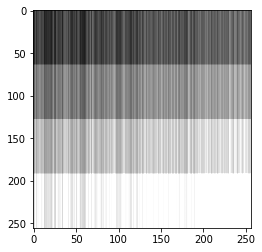

In [17]:
plt.imshow(apply_uniform_noise(image_e, 10, 80), cmap='gray', vmin=0, vmax=255)

In [18]:
def apply_gaussian_noise(image, mean, var, from_package=False):
  if from_package:
    noised_image = skimage.util.random_noise(image, mode='gaussian', mean=mean, var=var)*255
    return noised_image
  
  standard_deviation = var ** 0.5
  gaussian_noise = np.random.normal(mean, standard_deviation, image.shape)*255
  noised_image = image + gaussian_noise

  return noised_image

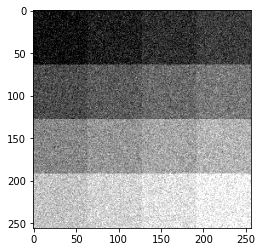

In [19]:
plt.imshow(apply_gaussian_noise(image_e, 0, 0.01), cmap='gray', vmin=0, vmax=255)

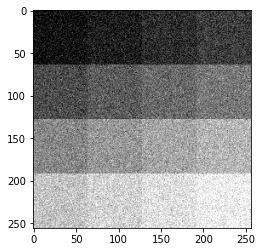

In [20]:
plt.imshow(apply_gaussian_noise(image_e, 0, 0.01, from_package=True), cmap='gray', vmin=0, vmax=255)

In [21]:
def apply_gama_noise(image, shape, scale):
  gama_noise = np.random.gamma(shape=shape, scale=scale, size=256)
  noised_image = image + gama_noise
  return noised_image

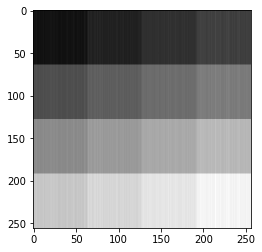

In [22]:
plt.imshow(apply_gama_noise(image_e, 2, 2), cmap='gray', vmin=0, vmax=255)

In [23]:
def apply_poisson_noise(image):
  noised_image = skimage.util.random_noise(image, mode='poisson')*255
  return noised_image

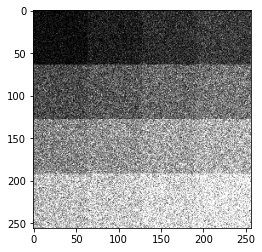

In [24]:
plt.imshow(apply_poisson_noise(image_e), cmap='gray', vmin=0, vmax=255)

# Definição das métricas de avaliação

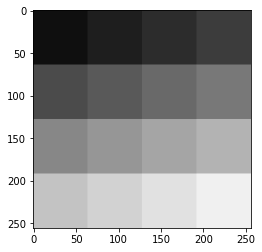

In [25]:
plt.imshow(image_e, cmap='gray', vmin=0, vmax=255)

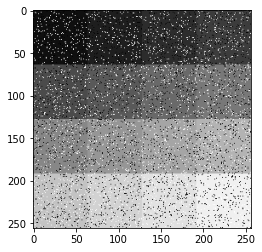

In [26]:
image_e_noised = apply_salt_and_pepper_noise(image_e, 0.05)
plt.imshow(image_e_noised, cmap='gray', vmin=0, vmax=255)

In [27]:
def maximum_error(f, g):
  return np.max(np.absolute(f - g))

In [28]:
maximum_error(image_e, image_e_noised)

241

In [29]:
def mean_absolute_error(f, g):
  absolute_sub = np.absolute(f - g)
  N, M = f.shape
  sum = 0

  for i in range(N):
    for j in range(M):
      sum += absolute_sub[i, j]
  
  return (1/(N*M))*sum

In [30]:
mean_absolute_error(image_e, image_e_noised)

13.062042236328125

In [31]:
sklearn.metrics.mean_absolute_error(image_e, image_e_noised)

13.047332763671875

In [32]:
def mean_square_error(f, g):
  power_sub = (f - g)**2
  N, M = f.shape
  sum = 0

  for i in range(N):
    for j in range(M):
      sum += power_sub[i, j]
  
  return (1/(N*M))*sum

In [33]:
mean_square_error(image_e, image_e_noised)

12.804168701171875

In [34]:
sklearn.metrics.mean_squared_error(image_e, image_e_noised)

12.804168701171875

In [35]:
def root_mean_square_error(f, g):
  power_sub = (f - g)**2
  N, M = f.shape
  sum = 0

  for i in range(N):
    for j in range(M):
      sum += power_sub[i, j]
  
  return np.sqrt((1/(N*M))*sum)

In [36]:
root_mean_square_error(image_e, image_e_noised)

3.5782913102725264

In [37]:
sklearn.metrics.mean_squared_error(image_e, image_e_noised, squared=False)

3.546150924387307

Ainda faltam:
* erro médio quadrático normalizado
* relação sinal-ruído de pico
* covariância
* coeficiente de Jaccard

# Correção gama

c=1 

y=0.04, 0.4, 1, 2, 5, 10, 25

In [38]:
#questao 5: restored_image = skimage.exposure.adjust_gamma(noised_image, gamma=1, gain=1)

# Equalização de Histograma

In [39]:
def get_acc_histogram(histogram):
  L = histogram.size
  acc_histogram = histogram.copy()

  for i in range(1, L):
    acc_histogram[i] += acc_histogram[i - 1]
  
  return acc_histogram

In [40]:
def equalize_histogram(image, gray_levels=256):
  equalized_image = np.zeros(image.shape)
  histogram = get_histogram(image)
  acc_histogram = get_acc_histogram(histogram)
  N, M = image.shape
  factor = (gray_levels - 1) / (N * M)

  for i in range(N):
    for j in range(M):
      equalized_image[i, j] = factor * acc_histogram[image[i,j]]

  return equalized_image

In [41]:
moon_image = skimage.io.imread('/content/Moon.tif', as_gray=True)

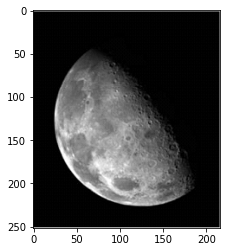

In [42]:
plt.imshow(moon_image, cmap='gray')

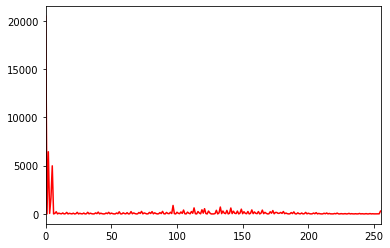

In [43]:
plot_histogram(moon_image)

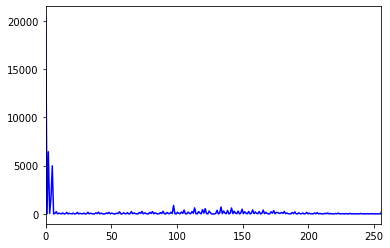

In [44]:
plot_histogram(moon_image, get_histogram(moon_image))

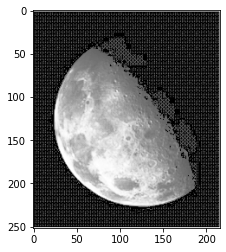

In [45]:
moon_image_equalized = equalize_histogram(moon_image)
plt.imshow(moon_image_equalized, cmap='gray')

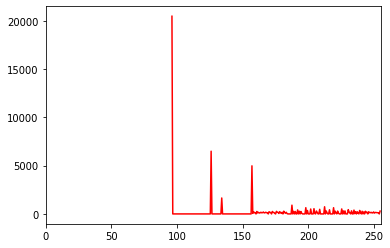

In [46]:
plot_histogram(moon_image_equalized)

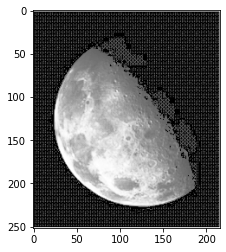

In [47]:
moon_image_equalized_from_package = skimage.exposure.equalize_hist(moon_image)*255
plt.imshow(moon_image_equalized_from_package, cmap='gray')

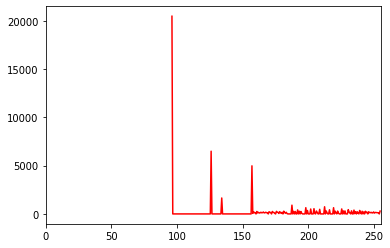

In [48]:
plot_histogram(moon_image_equalized_from_package)